In [1]:
%config Completer.use_jedi = False

In [2]:
#### Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
df2 = pd.read_csv(r'./movies.csv',encoding='latin-1')

In [5]:
df2.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [6]:
# Checking if any columns have missing values

for col in df2:
    pct_missing = np.mean(df2[col].isnull())
    print(col,pct_missing)

budget 0.0
company 0.0
country 0.0
director 0.0
genre 0.0
gross 0.0
name 0.0
rating 0.0
released 0.0
runtime 0.0
score 0.0
star 0.0
votes 0.0
writer 0.0
year 0.0


In [7]:
df2.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [8]:
#Chaning datatype of columns; Some columns have decimal points

df2["budget"] = df2['budget'].astype('int64')

df2["gross"]= df2["gross"].astype('int64')

df2.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [9]:
# Checking if year in the released column matches the year in the year column
df2[['released','year']] # Some of the years dont match 

,released,year
0,1986-08-22,1986
1,1986-06-11,1986
2,1986-05-16,1986
3,1986-07-18,1986
4,1986-08-01,1986
...,...,...
6815,2016-07-22,2016
6816,2016-05-06,2016
6817,2016-07-25,2016
6818,2016-12-02,2016


In [10]:
# Correcting the year column by extracting year from the released column and creating a new year column


df2['corrected_year']= df2['released'].astype(str).str[:4]
df2[['released','year','corrected_year']]

,released,year,corrected_year
0,1986-08-22,1986,1986
1,1986-06-11,1986,1986
2,1986-05-16,1986,1986
3,1986-07-18,1986,1986
4,1986-08-01,1986,1986
...,...,...,...
6815,2016-07-22,2016,2016
6816,2016-05-06,2016,2016
6817,2016-07-25,2016,2016
6818,2016-12-02,2016,2016


In [11]:
# Order the data by gross column
df2.sort_values(by=['gross'],inplace = False,ascending= False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [12]:
#Checking the correlation between the columns
df2.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


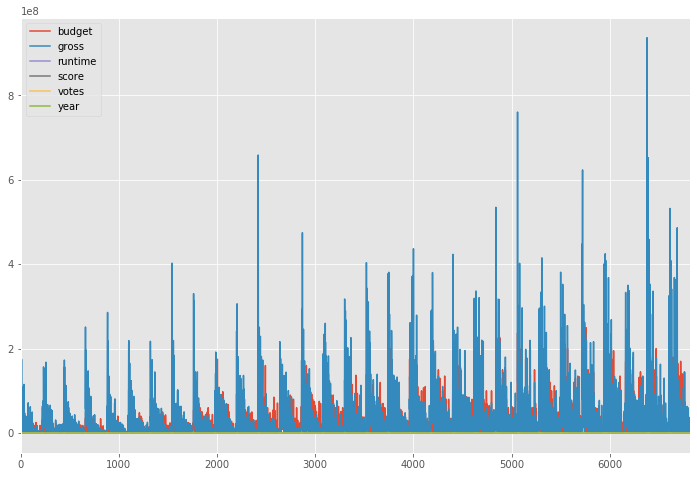

In [13]:
df2.plot()

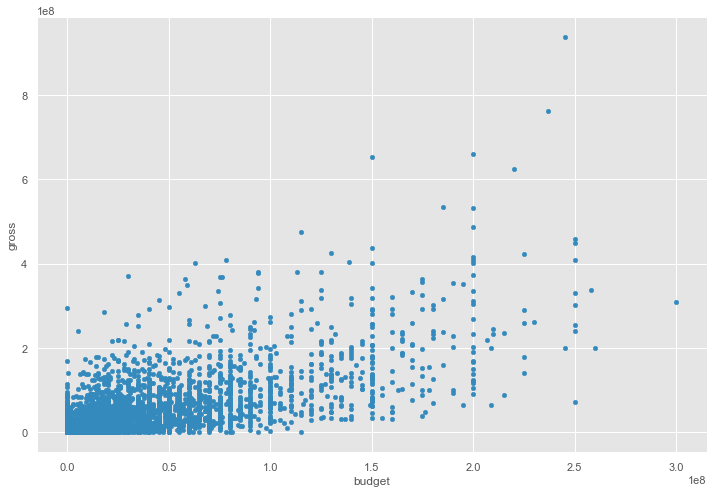

In [176]:
# Checking the correlation by ploting the columns
df2.plot(kind='scatter',x = 'budget', y ='gross' )

In [14]:

corelation_matrix = df2.corr()

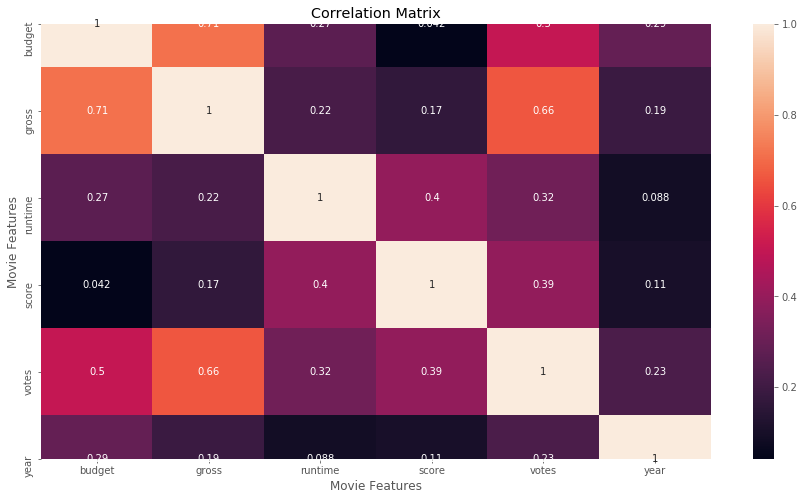

In [15]:
#Plotting the correction using a heatmap
sns.heatmap(corelation_matrix, annot=True)
plt.gcf().set_size_inches(15, 8)

plt.title("Correlation Matrix")

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")

plt.show()

In [16]:
#Checking the correlation in accord with company - non-numeric

df2.head()



,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [17]:
# Changing non-numeric to categorical values
df_categ = df2
df2.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [18]:
for col_name in df_categ.columns:
    if(df_categ[col_name].dtype == 'object'):
        df_categ[col_name] = df_categ[col_name].astype('category')
        df_categ[col_name] = df_categ[col_name].cat.codes   # Assiging random numbers to the non-numeric values.

df_categ

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
0,8000000,665,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,2335,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,2320,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,2336,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,2361,76,6.2,1370,6947,2946,2016,30


In [19]:
df_categ.dtypes

budget              int64
company             int16
country              int8
director            int16
genre                int8
gross               int64
name                int16
rating               int8
released            int16
runtime             int64
score             float64
star                int16
votes               int64
writer              int16
year                int64
corrected_year       int8
dtype: object

In [20]:
df_categ.corr()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204,-0.062707
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088,0.001822
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008382,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.016696,0.079542,0.019271,0.007893,0.011678,0.010740,0.016221,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025504,0.221736,-0.004635,0.996187,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342


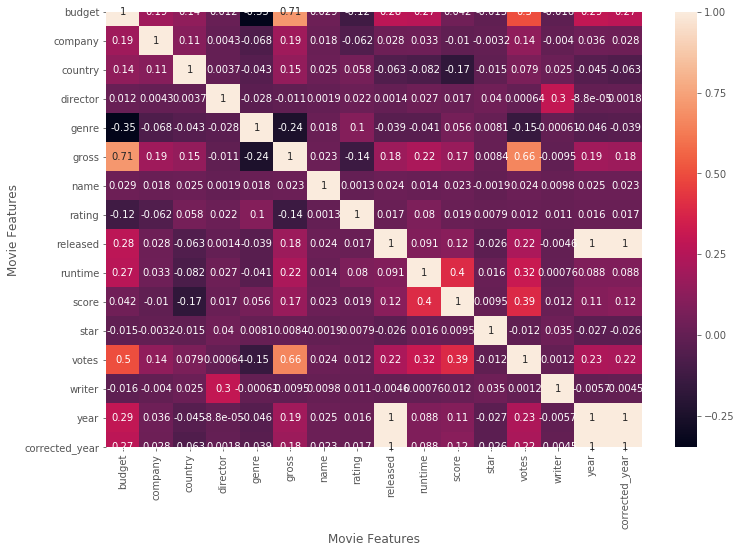

In [23]:
correlation1_matrix = df_categ.corr()
sns.heatmap(correlation1_matrix, annot = True)

plt.xlabel("Movie Features")

plt.ylabel("Movie Features")
plt.show()


In [27]:
corr_pairs = correlation1_matrix.unstack()

In [28]:
corr_pairs

budget          budget            1.000000
                company           0.187205
                country           0.137635
                director          0.011602
                genre            -0.346794
                                    ...   
corrected_year  star             -0.026050
                votes             0.220797
                writer           -0.004546
                year              0.996229
                corrected_year    1.000000
Length: 256, dtype: float64

In [32]:
high_corr = corr_pairs[(corr_pairs) > 0.5]

high_corr.sort_values() # There is no high correlation with company column

budget          votes             0.503924
votes           budget            0.503924
gross           votes             0.662457
votes           gross             0.662457
budget          gross             0.712196
gross           budget            0.712196
released        year              0.996187
year            released          0.996187
                corrected_year    0.996229
corrected_year  year              0.996229
                released          0.999389
released        corrected_year    0.999389
year            year              1.000000
writer          writer            1.000000
votes           votes             1.000000
star            star              1.000000
budget          budget            1.000000
runtime         runtime           1.000000
released        released          1.000000
rating          rating            1.000000
name            name              1.000000
gross           gross             1.000000
genre           genre             1.000000
director   